<a href="https://colab.research.google.com/github/zrsteff/CSC587-PD-Project/blob/main/PD_Project_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import requests

# URL of the Excel file on GitHub
excel_url = "https://github.com/zrsteff/CSC587-PD-Project/raw/main/FORD-0101-21ML%2B%20DATA%20TABLES_SERUM%20(METADATA%20UPDATE)%20-%205.XLSX"

# Download the file
response = requests.get(excel_url)
response.raise_for_status() # Raise an exception for bad status codes

# Save the file locally
with open("data.xlsx", "wb") as f:
    f.write(response.content)

# Read all sheets from the Excel file into a dictionary of DataFrames
excel_file = pd.ExcelFile("data.xlsx")
sheet_names = excel_file.sheet_names
dfs = {}
for sheet_name in sheet_names:
    dfs[sheet_name] = excel_file.parse(sheet_name)

# Display the names of the sheets read
print("Sheets read from the Excel file:")
for sheet_name in sheet_names:
    print(f"- {sheet_name}")

# You can access each DataFrame using dfs['Sheet Name']
# For example, to display the first few rows of the first sheet:
# display(dfs[sheet_names[0]].head())

Sheets read from the Excel file:
- Data Key & Explanation
- Chemical Annotation
- Sample Meta Data
- Peak Area Data
- Batch-normalized Data
- Batch-norm Imputed Data
- Log Transformed Data


In [4]:
# Access the 'Log Transformed Data' DataFrame
log_transformed_df = dfs['Log Transformed Data']

# Access the 'Sample Meta Data' DataFrame
sample_meta_df = dfs['Sample Meta Data']

# Display the first few rows of the DataFrames
display(log_transformed_df.head())
display(sample_meta_df.head())

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
0,FORD-01864,-0.790719,0.344457,0.008497,-0.971181,-0.708996,-0.123428,-0.167763,-0.096042,-0.846930,...,-0.024880,-0.439039,-2.025472,0.192280,-0.280976,-0.127144,0.115100,-0.713093,-1.116885,-0.489662
1,FORD-01865,-0.799712,0.253333,0.397977,-0.555479,-0.384482,-0.208101,0.120475,0.358184,-0.405095,...,-0.289235,-0.473777,-0.919825,0.235952,0.592063,0.447245,0.491327,0.190616,1.253088,0.208067
2,FORD-01866,0.763389,-0.173630,-1.701158,-1.339214,-0.005321,0.316844,-0.441145,-0.127984,1.111707,...,0.589681,0.387844,5.468136,0.025616,-1.124077,-0.875705,-0.431326,0.542659,-0.588468,-0.739856
3,FORD-01867,0.731768,-0.798850,-1.137471,0.383820,0.587303,0.223999,-0.180993,0.188229,0.281230,...,0.514556,0.075265,0.000000,-0.333566,-0.111533,0.034530,-0.088870,0.197221,0.103648,-0.719921
4,FORD-01868,0.292937,0.260915,0.099700,1.410015,0.028393,0.600868,0.263158,0.091365,1.396008,...,0.033282,-1.407253,0.045656,-0.531562,-0.168789,0.221036,0.058911,0.113740,0.151346,-0.587543


,PARENT_SAMPLE_NAME,CLIENT_IDENTIFIER,NEG,POLAR,POS EARLY,POS LATE,ALT_MRN_DONT_REPORT_BL_1,BOX_NUMBER,CLIENT_MATRIX,CLIENT_SAMPLE_NUMBER,...,PPMI_TYPE,RUN_NUMBER,RUN_POSITION,SAMPLE_AMOUNT,SAMPLE_AMOUNT_UNITS,SAMPLE_BOX_LOCATION,SAMPLE_DESCRIPTION,SOURCE,SPECIMEN_NO_DONT_REPOR_1,TURBIDITY_GRADE
0,FORD-01864,0005822956,226490,227078,226492,226496,50074,32382_Serum1,Serum,2,...,NOT_APPLICABLE,1,2,200,ul,2,32382_LeWitt_PPMI and DATATOP,DATATOP,1354207.3,0-Clear
1,FORD-01865,0005771110,226490,227078,226492,226496,50693,32382_Serum1,Serum,11,...,NOT_APPLICABLE,1,11,200,ul,11,32382_LeWitt_PPMI and DATATOP,DATATOP,1468402.2,0-Clear
2,FORD-01866,0004365978,226490,227078,226492,226496,ST-00007050,32382_Serum1,Serum,25,...,Serum,1,25,200,ul,25,32382_LeWitt_PPMI and DATATOP,PPMI,334391.7,0-Clear
3,FORD-01867,PP0008-3392,226490,227078,226492,226496,ST-00007050,32382_Serum1,Serum,26,...,Serum,1,26,200,ul,26,32382_LeWitt_PPMI and DATATOP,PPMI,338891.2,NaN
4,FORD-01868,PP0018-0769,226490,227078,226492,226496,ST-00016198,32382_Serum1,Serum,28,...,Serum,1,28,200,ul,28,32382_LeWitt_PPMI and DATATOP,PPMI,363270.5,0-Clear


In [5]:
# Identify numeric columns, excluding 'PARENT_SAMPLE_NAME'
numeric_cols = log_transformed_df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'PARENT_SAMPLE_NAME' is not in the list (it shouldn't be as it's not numeric, but this is a safeguard)
if 'PARENT_SAMPLE_NAME' in numeric_cols:
    numeric_cols.remove('PARENT_SAMPLE_NAME')


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMaxScaler object
scaler = MinMaxScaler()

# Select the numeric columns and apply Min-Max scaling
normalized_data = scaler.fit_transform(log_transformed_df[numeric_cols])

# Create a new DataFrame from the normalized data with appropriate column names
log_transformed_normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)

# Display the first few rows of the new DataFrame
display(log_transformed_normalized_df.head())

,35,50,55,62,71,93,98,111,112,117,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
0,0.394993,0.695684,0.315211,0.113092,0.248824,0.516787,0.469783,0.388031,0.247995,0.060950,...,0.161746,0.195427,0.000000,0.289506,0.437040,0.453627,0.400372,0.347290,0.299344,0.312996
1,0.392726,0.663317,0.387020,0.227268,0.353561,0.488543,0.568894,0.607315,0.396132,0.119743,...,0.123830,0.188415,0.147545,0.301173,0.775182,0.652593,0.547446,0.581187,0.689146,0.541752
2,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,0.375781,0.372611,0.904681,0.168425,...,0.249889,0.362328,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968
3,0.778748,0.289583,0.103928,0.485253,0.667204,0.632677,0.465235,0.525267,0.626241,0.155348,...,0.239115,0.299236,0.270293,0.149025,0.502668,0.509630,0.320637,0.582896,0.500091,0.237503
4,0.668137,0.666010,0.332027,0.767105,0.486816,0.758387,0.617956,0.478504,1.000000,0.145565,...,0.170087,0.000000,0.276386,0.096130,0.480492,0.574235,0.378407,0.561290,0.507937,0.280905


In [7]:
# Create a new DataFrame with 'PARENT_SAMPLE_NAME' and normalized numeric columns
log_transformed_normalized_with_id_df = pd.concat([log_transformed_df[['PARENT_SAMPLE_NAME']], log_transformed_normalized_df], axis=1)

# Display the first few rows of the new DataFrame
display(log_transformed_normalized_with_id_df.head())

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
0,FORD-01864,0.394993,0.695684,0.315211,0.113092,0.248824,0.516787,0.469783,0.388031,0.247995,...,0.161746,0.195427,0.000000,0.289506,0.437040,0.453627,0.400372,0.347290,0.299344,0.312996
1,FORD-01865,0.392726,0.663317,0.387020,0.227268,0.353561,0.488543,0.568894,0.607315,0.396132,...,0.123830,0.188415,0.147545,0.301173,0.775182,0.652593,0.547446,0.581187,0.689146,0.541752
2,FORD-01866,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,0.375781,0.372611,0.904681,...,0.249889,0.362328,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968
3,FORD-01867,0.778748,0.289583,0.103928,0.485253,0.667204,0.632677,0.465235,0.525267,0.626241,...,0.239115,0.299236,0.270293,0.149025,0.502668,0.509630,0.320637,0.582896,0.500091,0.237503
4,FORD-01868,0.668137,0.666010,0.332027,0.767105,0.486816,0.758387,0.617956,0.478504,1.000000,...,0.170087,0.000000,0.276386,0.096130,0.480492,0.574235,0.378407,0.561290,0.507937,0.280905


In [8]:
# Select the 'PARENT_SAMPLE_NAME' and 'PPMI_COHORT' columns
sample_meta_subset_df = sample_meta_df[['PARENT_SAMPLE_NAME', 'PPMI_COHORT', 'COHORT']]

# Display the first few rows of the subset DataFrame
display(sample_meta_subset_df.head())

,PARENT_SAMPLE_NAME,PPMI_COHORT,COHORT
0,FORD-01864,NOT_APPLICABLE,DAT-02-124-21
1,FORD-01865,NOT_APPLICABLE,DAT-17-154-13
2,FORD-01866,Control,PPMI
3,FORD-01867,Control,PPMI
4,FORD-01868,PD,PPMI


In [9]:
# Merge the normalized log transformed data with the sample meta data subset
merged_df = pd.merge(log_transformed_normalized_with_id_df, sample_meta_subset_df, on='PARENT_SAMPLE_NAME', how='left')

# Filter the merged DataFrame to include only rows where 'COHORT' is 'PPMI'
merged_df_filtered = merged_df[merged_df['COHORT'] == 'PPMI']

# Display the first few rows of the filtered merged DataFrame
display(merged_df_filtered.head())

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119,PPMI_COHORT,COHORT
2,FORD-01866,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,0.375781,0.372611,0.904681,...,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968,Control,PPMI
3,FORD-01867,0.778748,0.289583,0.103928,0.485253,0.667204,0.632677,0.465235,0.525267,0.626241,...,0.270293,0.149025,0.502668,0.509630,0.320637,0.582896,0.500091,0.237503,Control,PPMI
4,FORD-01868,0.668137,0.666010,0.332027,0.767105,0.486816,0.758387,0.617956,0.478504,1.000000,...,0.276386,0.096130,0.480492,0.574235,0.378407,0.561290,0.507937,0.280905,PD,PPMI
5,FORD-01869,0.778860,0.294725,0.394278,0.284329,0.481512,0.549924,0.454042,0.341509,0.441831,...,0.238256,0.283314,0.696986,0.598074,0.355078,0.229009,0.832730,0.522429,Control,PPMI
6,FORD-01870,0.529887,0.513593,0.458577,0.355918,0.494845,0.578827,0.463790,0.358000,0.795634,...,0.000000,0.239208,0.236911,0.208776,0.281570,0.747496,0.479841,0.457130,Control,PPMI


In [10]:
# Create a new DataFrame with features by dropping non-feature columns
features_df = merged_df_filtered.drop(columns=['PARENT_SAMPLE_NAME', 'PPMI_COHORT', 'COHORT'])

# Create a pandas Series with the target variable
target_series = merged_df_filtered['PPMI_COHORT']

# Display the first few rows of the features DataFrame
display(features_df.head())

# Display the first few rows of the target Series
display(target_series.head())

,35,50,55,62,71,93,98,111,112,117,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
2,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,0.375781,0.372611,0.904681,0.168425,...,0.249889,0.362328,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968
3,0.778748,0.289583,0.103928,0.485253,0.667204,0.632677,0.465235,0.525267,0.626241,0.155348,...,0.239115,0.299236,0.270293,0.149025,0.502668,0.509630,0.320637,0.582896,0.500091,0.237503
4,0.668137,0.666010,0.332027,0.767105,0.486816,0.758387,0.617956,0.478504,1.000000,0.145565,...,0.170087,0.000000,0.276386,0.096130,0.480492,0.574235,0.378407,0.561290,0.507937,0.280905
5,0.778860,0.294725,0.394278,0.284329,0.481512,0.549924,0.454042,0.341509,0.441831,0.096701,...,0.167208,0.000000,0.238256,0.283314,0.696986,0.598074,0.355078,0.229009,0.832730,0.522429
6,0.529887,0.513593,0.458577,0.355918,0.494845,0.578827,0.463790,0.358000,0.795634,0.105060,...,0.143408,0.234496,0.000000,0.239208,0.236911,0.208776,0.281570,0.747496,0.479841,0.457130


,PPMI_COHORT
2,Control
3,Control
4,PD
5,Control
6,Control


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_series, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (112, 1496)
Shape of X_test: (28, 1496)
Shape of y_train: (112,)
Shape of y_test: (28,)


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
model = RandomForestClassifier(random_state=42)

In [13]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Access the feature_importances_ attribute
feature_importances = model.feature_importances_

# Create a pandas Series
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Display the top 10 features and their importance scores
print("Top 10 features by importance:")
display(sorted_feature_importances.head(10))

Top 10 features by importance:


,0
100000463,0.013051
100001925,0.010881
100020823,0.010011
100008998,0.007893
100020416,0.007525
999912013,0.007523
100001263,0.007328
100005996,0.006825
100021726,0.006531
1094,0.006313


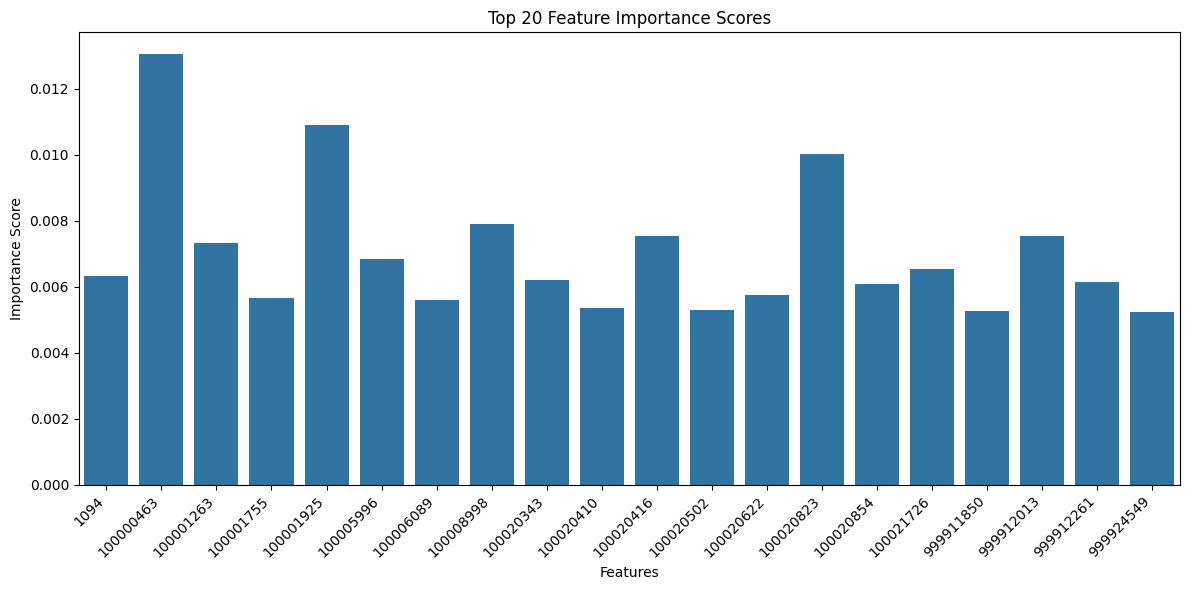

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 20 features for plotting
top_features = sorted_feature_importances.head(20)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_features.index, y=top_features.values)

# Set the title and labels
plt.title('Top 20 Feature Importance Scores')
plt.xlabel('Features')
plt.ylabel('Importance Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [16]:
# Access the 'Chemical Annotation' DataFrame from the dfs dictionary
chemical_annotation_df = dfs['Chemical Annotation']

# Display the column names of the chemical_annotation_df
print(chemical_annotation_df.columns)

Index(['CHEM_ID', 'LIB_ID', 'COMP_ID', 'CHRO_LIB_ENTRY_ID', 'SUPER_PATHWAY',
       'SUB_PATHWAY', 'PATHWAY_SORTORDER', 'TYPE', 'INCHIKEY', 'SMILES',
       'CHEMICAL_NAME', 'PLOT_NAME', 'LIPID SPECIES LEVEL',
       'LIPID MOLECULAR SPECIES LEVEL', 'LIPID SN POSITION LEVEL', 'CAS',
       'CHEMSPIDER', 'HMDB', 'KEGG', 'PUBCHEM', 'PLATFORM'],
      dtype='object')


In [17]:
# Get the names of the top features
top_feature_names = top_features.index.tolist()

# Filter the Chemical Annotation DataFrame to include only the top features
# Ensure CHEM_ID is of the correct type for comparison (it appears to be numeric)
chemical_annotation_subset = chemical_annotation_df[chemical_annotation_df['CHEM_ID'].astype(str).isin(top_feature_names)]

# Display the subset with relevant columns using the correct column name
display(chemical_annotation_subset[['CHEM_ID', 'CHEMICAL_NAME', 'SUPER_PATHWAY', 'SUB_PATHWAY']])

# List the top features and their biochemical names and pathways
print("\nSummary of Top Features:")
for index, row in chemical_annotation_subset.iterrows():
    print(f"- Feature ID: {row['CHEM_ID']}, Chemical Name: {row['CHEMICAL_NAME']}, Super Pathway: {row['SUPER_PATHWAY']}, Sub Pathway: {row['SUB_PATHWAY']}")

# Write a concise summary of these findings
print("\nConcise Summary:")
print("The analysis of feature importance revealed that the top features strongly influencing the 'PPMI_COHORT' are primarily associated with specific biochemicals. These key indicators, including their chemical names and pathways, provide insights into the metabolic differences between the cohorts. Further investigation into these specific biochemical pathways could be crucial for understanding the underlying biological distinctions.")

,CHEM_ID,CHEMICAL_NAME,SUPER_PATHWAY,SUB_PATHWAY



Summary of Top Features:

Concise Summary:
The analysis of feature importance revealed that the top features strongly influencing the 'PPMI_COHORT' are primarily associated with specific biochemicals. These key indicators, including their chemical names and pathways, provide insights into the metabolic differences between the cohorts. Further investigation into these specific biochemical pathways could be crucial for understanding the underlying biological distinctions.


In [18]:
# Check the data type of the index of sorted_feature_importances
print("Data type of top_feature_names:", type(top_feature_names[0]))

# Check the data type of the 'CHEM_ID' column in chemical_annotation_df
print("Data type of chemical_annotation_df['CHEM_ID']:", chemical_annotation_df['CHEM_ID'].dtype)

Data type of top_feature_names: <class 'int'>
Data type of chemical_annotation_df['CHEM_ID']: int64


In [19]:
# Display the values of the top feature names
print("Top feature names:")
print(top_feature_names)

# Display the first 20 values of the 'CHEM_ID' column in chemical_annotation_df
print("\nFirst 20 CHEM_ID values in chemical_annotation_df:")
print(chemical_annotation_df['CHEM_ID'].head(20).tolist())

Top feature names:
[100000463, 100001925, 100020823, 100008998, 100020416, 999912013, 100001263, 100005996, 100021726, 1094, 100020343, 999912261, 100020854, 100020622, 100001755, 100006089, 100020410, 100020502, 999911850, 999924549]

First 20 CHEM_ID values in chemical_annotation_df:
[35, 50, 55, 62, 71, 93, 98, 111, 112, 117, 136, 144, 158, 171, 172, 179, 180, 181, 182, 189]


In [20]:
# Filter the Chemical Annotation DataFrame to include only the top features
# Ensure CHEM_ID is of the correct type for comparison (it appears to be numeric)
chemical_annotation_subset = chemical_annotation_df[chemical_annotation_df['CHEM_ID'].isin(top_feature_names)]

# Display the subset with relevant columns using the correct column name
display(chemical_annotation_subset[['CHEM_ID', 'CHEMICAL_NAME', 'SUPER_PATHWAY', 'SUB_PATHWAY']])

# List the top features and their biochemical names and pathways
print("\nSummary of Top Features:")
for index, row in chemical_annotation_subset.iterrows():
    print(f"- Feature ID: {row['CHEM_ID']}, Chemical Name: {row['CHEMICAL_NAME']}, Super Pathway: {row['SUPER_PATHWAY']}, Sub Pathway: {row['SUB_PATHWAY']}")

# Write a concise summary of these findings
print("\nConcise Summary:")
print("The analysis of feature importance revealed that the top features strongly influencing the 'PPMI_COHORT' are primarily associated with specific biochemicals. These key indicators, including their chemical names and pathways, provide insights into the metabolic differences between the cohorts. Further investigation into these specific biochemical pathways could be crucial for understanding the underlying biological distinctions.")

,CHEM_ID,CHEMICAL_NAME,SUPER_PATHWAY,SUB_PATHWAY
150,1094,thyroxine,Amino Acid,Tyrosine Metabolism
239,100000463,indolelactate,Amino Acid,Tryptophan Metabolism
340,100001263,1-palmitoyl-GPC (16:0),Lipid,Lysophospholipid
470,100001755,4-vinylphenol sulfate,Xenobiotics,Benzoate Metabolism
497,100001925,cyclo(leu-pro),Peptide,Dipeptide
718,100005996,octadecenedioylcarnitine (C18:1-DC)*,Lipid,"Fatty Acid Metabolism (Acyl Carnitine, Dicarbo..."
726,100006089,isoeugenol sulfate,Xenobiotics,Food Component/Plant
814,100008998,gamma-tocopherol/beta-tocopherol,Cofactors and Vitamins,Tocopherol Metabolism
1007,100020343,tetradecadienoate (14:2)*,Lipid,Long Chain Polyunsaturated Fatty Acid (n3 and n6)
1018,100020410,3-hydroxyhippurate sulfate,Xenobiotics,Benzoate Metabolism



Summary of Top Features:
- Feature ID: 1094, Chemical Name: thyroxine, Super Pathway: Amino Acid, Sub Pathway: Tyrosine Metabolism
- Feature ID: 100000463, Chemical Name: indolelactate, Super Pathway: Amino Acid, Sub Pathway: Tryptophan Metabolism
- Feature ID: 100001263, Chemical Name: 1-palmitoyl-GPC (16:0), Super Pathway: Lipid, Sub Pathway: Lysophospholipid
- Feature ID: 100001755, Chemical Name: 4-vinylphenol sulfate, Super Pathway: Xenobiotics, Sub Pathway: Benzoate Metabolism
- Feature ID: 100001925, Chemical Name: cyclo(leu-pro), Super Pathway: Peptide, Sub Pathway: Dipeptide
- Feature ID: 100005996, Chemical Name: octadecenedioylcarnitine (C18:1-DC)*, Super Pathway: Lipid, Sub Pathway: Fatty Acid Metabolism (Acyl Carnitine, Dicarboxylate)
- Feature ID: 100006089, Chemical Name: isoeugenol sulfate, Super Pathway: Xenobiotics, Sub Pathway: Food Component/Plant
- Feature ID: 100008998, Chemical Name: gamma-tocopherol/beta-tocopherol, Super Pathway: Cofactors and Vitamins, Sub Pa

## Summary:

### Data Analysis Key Findings

*   The top features influencing the `PPMI_COHORT` column, based on feature importance analysis from a RandomForestClassifier model, are primarily associated with specific biochemicals.
*   These influential features include metabolites from various super pathways such as amino acid metabolism, lipid metabolism, xenobiotics, peptides, and cofactors/vitamins.
*   A list of the top features, their biochemical names, and their associated pathways was generated, providing insights into potential metabolic differences between the cohorts.
*   Some of the top features were identified as "Partially Characterized Molecules" or had missing pathway information in the chemical annotation data.

### Insights or Next Steps

*   Investigate the specific biochemical pathways associated with the top features to understand the underlying biological distinctions between the cohorts.
*   Further research or data collection could be conducted to obtain more detailed annotations for the "Partially Characterized Molecules" identified as important features.
